In [2]:
#-*- coding: utf-8 -*-
import glob
import json

In [3]:
!git clone https://github.com/chinese-poetry/chinese-poetry

Cloning into 'chinese-poetry'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 5781 (delta 0), reused 0 (delta 0), pack-reused 5780
Receiving objects: 100% (5781/5781), 186.09 MiB | 23.01 MiB/s, done.
Resolving deltas: 100% (4495/4495), done.
Checking out files: 100% (1371/1371), done.


In [4]:
poet_name = ["苏轼", "蘇軾"]
dynasty = "song" # choice from ["tang", "song"]
shiciji_file_name = "sushi"
shiciji = []
for p_name in poet_name:
    files = glob.glob("./chinese-poetry/json/poet.{}*.json".format(dynasty))
    files1 = glob.glob("./chinese-poetry/ci/*.json")
    files.extend(files1)
    fo = open(shiciji_file_name, 'w')
    for file in files:
        with open(file) as fi:
            fi_json = json.load(fi)
            for poem in fi_json:
                if 'author' in poem and poem["author"] == p_name:
                    shiciji.extend(poem["paragraphs"])


print(len(shiciji))
for item in shiciji:
    fo.write(item)
    fo.write("\n")

17766


In [5]:
!pip install jieba

In [6]:
!pip install wordcloud

In [8]:
!git clone https://github.com/MerakDipper/shiyun.git

Cloning into 'shiyun'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


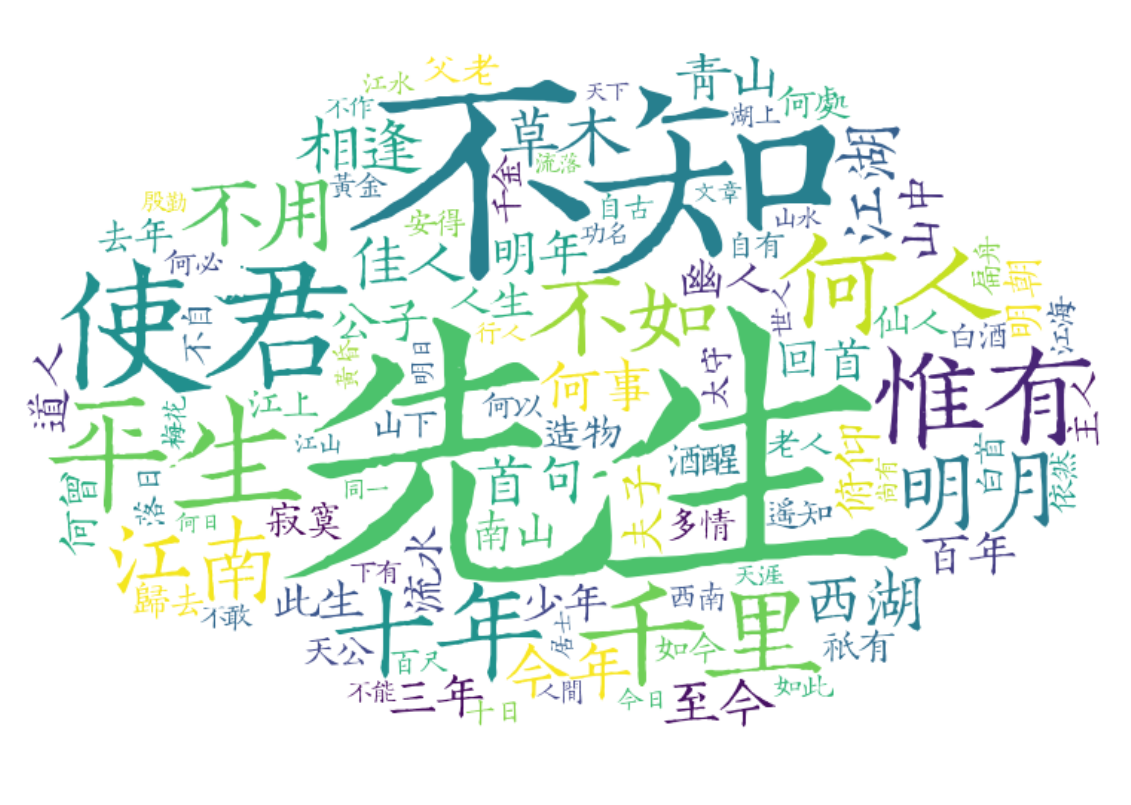

In [9]:
import jieba
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
plt.rcParams['figure.dpi']= 250
#stopwords is NOT working properly for now.
stopwords = set()
stopwords.add("故人")
stopwords.add("不可")
poet_text_path = './sushi'
text_from_file_with_apath = open(poet_text_path).read()
wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)

back_img = np.array(Image.open("./shiyun/cloud5.png"))
my_wordcloud = WordCloud(font_path="./shiyun/ZiYueSongKeBenJianTi-2.ttf",
                           background_color="white",
                           max_words=100,
                           max_font_size=200,
                           width=1280,
                           stopwords=stopwords,
                           mask=back_img,
                           height=800).generate(wl_space_split)

plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()